# ANN Project - Image Classifier for Clothing App

*   2301931251 - Daffa Rizki Rizaly 
* 2301937293 - Edbert Khovey 
* 2301869840 - William Yulio

In [1]:
# Import Library
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, ZeroPadding2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
x_train = x_train / 255.0

x_test = x_test / 255.0

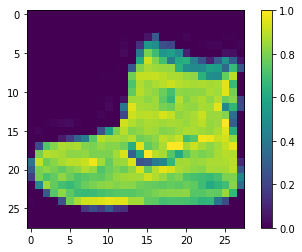

In [4]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
classes = {0: 'T-shirt/top', 
           1: 'Trouser', 
           2: 'Pullover', 
           3: 'Dress', 
           4: 'Coat',
           5: 'Sandal', 
           6: 'Shirt', 
           7: 'Sneaker', 
           8: 'Bag', 
           9: 'Ankle boot'}

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
                       'Sandal','Shirt','Sneaker','Bag','Ankle boot']

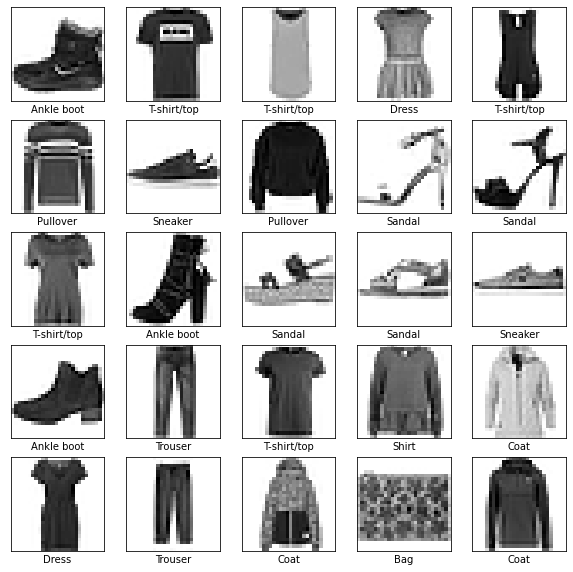

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [7]:
X_train, X_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state=42)

In [8]:
n_cols = X_train.shape[1]
model = Sequential()

model.add(Dense(512, activation='relu', input_shape=(n_cols,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               14848     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 81,802
Trainable params: 81,802
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer=Adam(lr = 0.2),
              loss='sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [11]:
image_rows = 28
image_cols = 28
input_shape = (image_rows, image_cols, 1)

X_train = X_train.reshape(X_train.shape[0], image_rows, image_cols, 1)
X_test = x_test.reshape(x_test.shape[0], image_rows, image_cols, 1)
X_validate = X_validate.reshape(X_validate.shape[0], image_rows, image_cols, 1)

print('x_train shape: {}'.format(X_train.shape))
print('x_test shape: {}'.format(X_test.shape))
print('x_validate shape: {}'.format(X_validate.shape))

x_train shape: (48000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_validate shape: (12000, 28, 28, 1)


In [12]:
# One-hot encoding
y_train = to_categorical(y_train, 10)
y_validate = to_categorical(y_validate, 10)
y_test = to_categorical(y_test, 10)

#CNN - 1 Convolution layer


In [13]:
cnn_model = Sequential()

cnn_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten()) 

cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.3))

cnn_model.add(Dense(10, activation='softmax'))

In [14]:
cnn_model.compile(optimizer= Adam(lr= 0.02),
          loss='categorical_crossentropy',
          metrics=['accuracy'])

In [15]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               692352    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [16]:
history = cnn_model.fit(X_train, y_train,
          batch_size=300,
          epochs=50,
          verbose=1,
          validation_data=(X_validate, y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 23s 474us/sample - loss: 0.5360 - accuracy: 0.8131 - val_loss: 0.3344 - val_accuracy: 0.8759
Epoch 2/50
48000/48000 [==============================] - 22s 458us/sample - loss: 0.3641 - accuracy: 0.8662 - val_loss: 0.3111 - val_accuracy: 0.8878
Epoch 3/50
48000/48000 [==============================] - 22s 460us/sample - loss: 0.3350 - accuracy: 0.8763 - val_loss: 0.3102 - val_accuracy: 0.8894
Epoch 4/50
48000/48000 [==============================] - 22s 462us/sample - loss: 0.3190 - accuracy: 0.8806 - val_loss: 0.2917 - val_accuracy: 0.8913
Epoch 5/50
48000/48000 [==============================] - 22s 461us/sample - loss: 0.3087 - accuracy: 0.8859 - val_loss: 0.2856 - val_accuracy: 0.8951
Epoch 6/50
48000/48000 [==============================] - 22s 459us/sample - loss: 0.2931 - accuracy: 0.8898 - val_loss: 0.3047 - val_accuracy: 0.8906
Epoch 7/50
48000/48000 [====================

In [17]:
score = cnn_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.3871641261100769
Test accuracy: 89.24000263214111


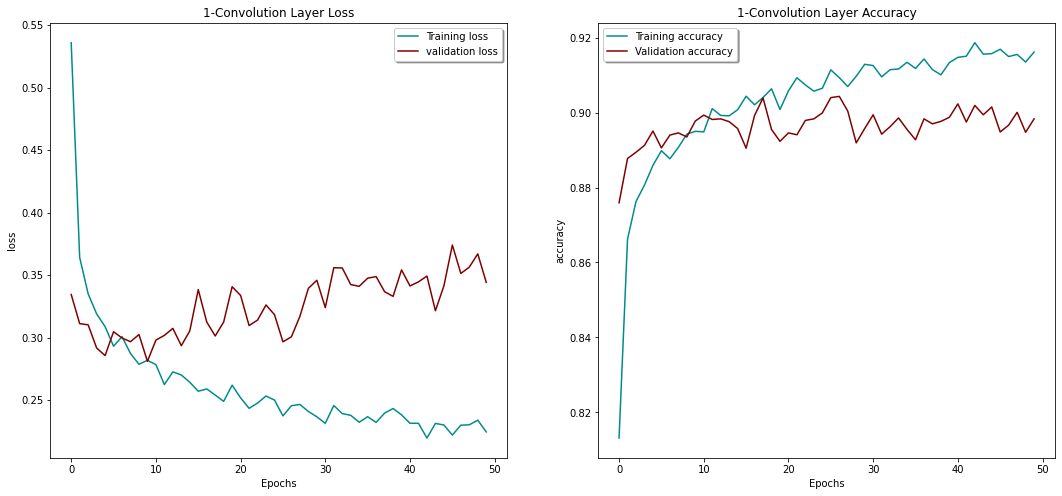

In [19]:

plt.figure(figsize = (18,8))
plt.subplot(121)
plt.plot(history.history['loss'], color='darkcyan', label="Training loss")
plt.plot(history.history['val_loss'], color='maroon', label="validation loss",)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='best', shadow=True)
plt.title('1-Convolution Layer Loss')
plt.subplot(122)
plt.plot(history.history['accuracy'], color='darkcyan', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='maroon',label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc='best', shadow=True)
plt.title('1-Convolution Layer Accuracy')
plt.show()

#CNN - 2 Convolution layer


In [20]:
cnn_model_2 = Sequential()

cnn_model_2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn_model_2.add(Dropout(0.2))
cnn_model_2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn_model_2.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model_2.add(Dropout(0.3))
cnn_model_2.add(Flatten())

cnn_model_2.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
cnn_model_2.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

cnn_model_2.add(Dense(10, activation='softmax'))

In [21]:
cnn_model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_2 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)               

In [22]:

cnn_model_2.compile(optimizer= Adam(lr= 0.02),
          loss='categorical_crossentropy',
          metrics=['accuracy'])

In [23]:
early_stopping_monitor = EarlyStopping(patience = 3)

In [24]:
history_2 = cnn_model_2.fit(X_train, y_train,
          batch_size= 300,
          epochs=50,
          verbose=1,
          validation_data=(X_validate, y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 119s 2ms/sample - loss: 0.6448 - accuracy: 0.7685 - val_loss: 0.3750 - val_accuracy: 0.8613
Epoch 2/50
48000/48000 [==============================] - 118s 2ms/sample - loss: 0.3808 - accuracy: 0.8603 - val_loss: 0.3254 - val_accuracy: 0.8800
Epoch 3/50
48000/48000 [==============================] - 118s 2ms/sample - loss: 0.3572 - accuracy: 0.8672 - val_loss: 0.3378 - val_accuracy: 0.8751
Epoch 4/50
48000/48000 [==============================] - 118s 2ms/sample - loss: 0.3390 - accuracy: 0.8739 - val_loss: 0.2976 - val_accuracy: 0.8954
Epoch 5/50
48000/48000 [==============================] - 118s 2ms/sample - loss: 0.3272 - accuracy: 0.8803 - val_loss: 0.3140 - val_accuracy: 0.8859
Epoch 6/50
48000/48000 [==============================] - 118s 2ms/sample - loss: 0.3186 - accuracy: 0.8818 - val_loss: 0.2954 - val_accuracy: 0.8932
Epoch 7/50
48000/48000 [==========================

In [25]:
score = cnn_model_2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.34465054413080215
Test accuracy: 88.55000138282776


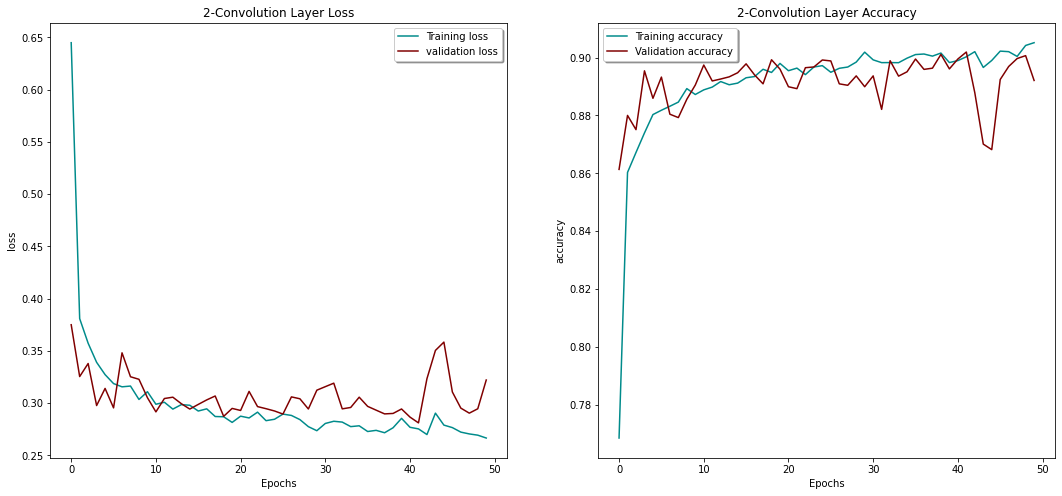

In [26]:
plt.figure(figsize = (18,8))
plt.subplot(121)
plt.plot(history_2.history['loss'], color='darkcyan', label="Training loss")
plt.plot(history_2.history['val_loss'], color='maroon', label="validation loss",)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='best', shadow=True)
plt.title('2-Convolution Layer Loss')
plt.subplot(122)
plt.plot(history_2.history['accuracy'], color='darkcyan', label="Training accuracy")
plt.plot(history_2.history['val_accuracy'], color='maroon',label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc='best', shadow=True)
plt.title('2-Convolution Layer Accuracy')
plt.show()

#CNN - 3 Convolution layer


In [27]:
cnn_model_3 = Sequential()

cnn_model_3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn_model_3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn_model_3.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model_3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn_model_3.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model_3.add(Dropout(0.3))
cnn_model_3.add(Flatten()) 

cnn_model_3.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

cnn_model_3.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

cnn_model_3.add(Dense(10, activation='softmax'))

In [28]:
cnn_model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3200)             

In [30]:
cnn_model_3.compile(optimizer= Adam(lr= 0.02),
          loss='categorical_crossentropy',
          metrics=['accuracy'])

In [31]:
history_3 = cnn_model_3.fit(X_train, y_train,
                            batch_size=300,
                            epochs=50,
                            verbose=1,
                            validation_data=(X_validate, y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 157s 3ms/sample - loss: 1.6142 - accuracy: 0.4477 - val_loss: 0.5905 - val_accuracy: 0.7551
Epoch 2/50
48000/48000 [==============================] - 156s 3ms/sample - loss: 0.5221 - accuracy: 0.7975 - val_loss: 0.4433 - val_accuracy: 0.8311
Epoch 3/50
48000/48000 [==============================] - 157s 3ms/sample - loss: 0.4589 - accuracy: 0.8230 - val_loss: 0.4161 - val_accuracy: 0.8404
Epoch 4/50
48000/48000 [==============================] - 157s 3ms/sample - loss: 0.4422 - accuracy: 0.8302 - val_loss: 0.4132 - val_accuracy: 0.8426
Epoch 5/50
48000/48000 [==============================] - 156s 3ms/sample - loss: 0.4312 - accuracy: 0.8348 - val_loss: 0.4171 - val_accuracy: 0.8404
Epoch 6/50
48000/48000 [==============================] - 156s 3ms/sample - loss: 0.4182 - accuracy: 0.8389 - val_loss: 0.4212 - val_accuracy: 0.8407
Epoch 7/50
48000/48000 [==========================

In [36]:
y_pred = cnn_model_3.predict_classes(X_test, verbose=0)
score = cnn_model_3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.37178565495014193
Test accuracy: 86.36000156402588


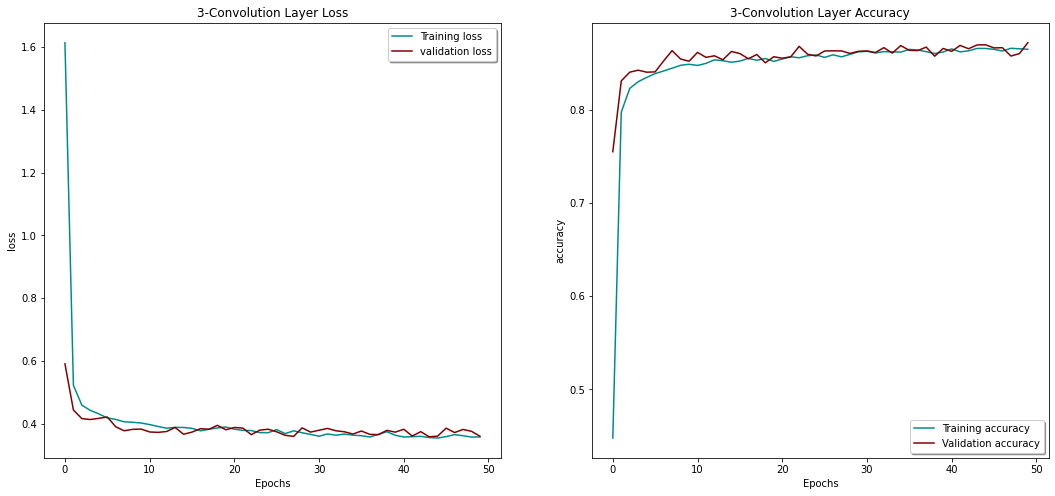

In [37]:
plt.figure(figsize = (18,8))
plt.subplot(121)
plt.plot(history_3.history['loss'], color='darkcyan', label="Training loss")
plt.plot(history_3.history['val_loss'], color='maroon', label="validation loss",)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='best', shadow=True)
plt.title('3-Convolution Layer Loss')
plt.subplot(122)
plt.plot(history_3.history['accuracy'], color='darkcyan', label="Training accuracy")
plt.plot(history_3.history['val_accuracy'], color='maroon',label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc='best', shadow=True)
plt.title('3-Convolution Layer Accuracy')
plt.show()

#Evaluation

In [38]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize = (8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes = class_names)

ValueError: ignored

In [ ]:
print(classification_report(Y_test, y_pred))
